## This is a Project Based on Car Price Predictions Using Linear Regression Model

In [335]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [336]:
# Loading the dataset of car_ prices
cars = pd.read_csv("CarPrice_Assignment.csv")

In [337]:
# printing first 5 rows of  dataset
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1]:
# Obtaining the shape of the cars
cars.shape
# Features : 205 Columns: 26

NameError: name 'cars' is not defined

In [339]:
# Obtaining statistics of the dataset
cars.describe() # Gives the statistics of the dataset

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [340]:
# Obtaining information from the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [341]:
cars.isnull().sum() # Checks for empty features of the dataset

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [342]:
# Renaming the CarName column into CompanyName
CompanyName = cars['CarName'].apply(lambda x: x.split(" ")[0])
cars.insert(3, "CompanyName", CompanyName)
cars.drop(['CarName'], axis = 1, inplace = True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [343]:
# Obtaining the unique values of the car
cars.CompanyName.unique() # Checking the uniqueness of the companyName

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [344]:
# Replacing all the anormalies in the CompanyNames
cars.CompanyName = cars.CompanyName.str.lower()

In [345]:
def replace_name(a, b):
    cars.CompanyName.replace(a,b, inplace = True)

replace_name("alfa-romero", "alfa-romero")
replace_name("maxda", "mazda")
replace_name("porcshce", "porsche")
replace_name("toyouta", "toyota")
replace_name("vw", "volkswagen")
replace_name("vokswagen", "volkswagen")

C:\Users\hp\AppData\Local\Temp\ipykernel_22240\1984889689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars.CompanyName.replace(a,b, inplace = True)


In [346]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [347]:
# Checking for duplicates in the cars
cars.loc[cars.duplicated()] # Checks for duplicates in the car names
# 0: indicates that there are no duplicates in the car names

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [348]:
# Checking for the columns
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_22240\3659786933.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars.price)


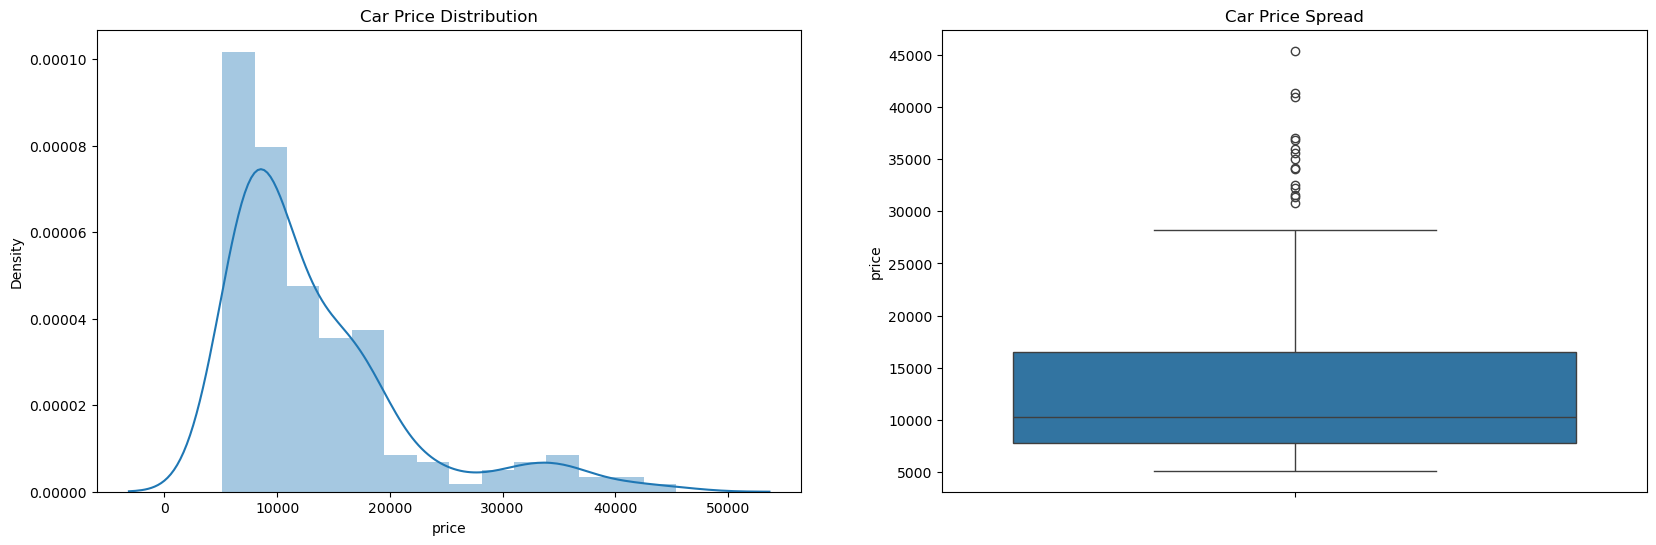

In [349]:
# Data Vislualization of the car datasets
plt.figure(figsize =(20,6)) # Specifies the figure size
plt.subplot(1,2,1)
sns.distplot(cars.price)
plt.title("Car Price Distribution")

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y = cars.price)
plt.show()

In [350]:
# Obtaining indepth statistics into the price of the cars
print(cars.price.describe(percentiles = [0.25,0.50, 0.75, 0.85, 0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


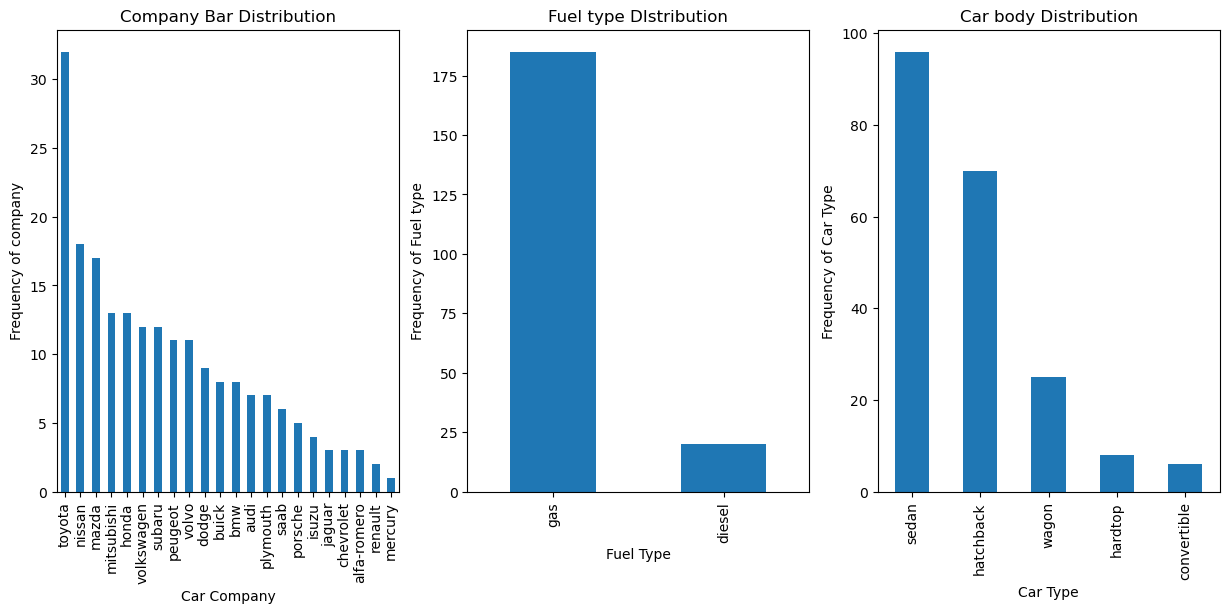

In [351]:
# Determining the Number of cars per company/Fuel/Car Type
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind = 'bar') # Counts the number of companycars
plt.title("Company Bar Distribution")
plt1.set(xlabel = "Car Company", ylabel = "Frequency of company")

plt.subplot(1,3,2)
plt1= cars['fueltype'].value_counts().plot(kind = 'bar')
plt.title("Fuel type DIstribution")
plt1.set(xlabel = "Fuel Type", ylabel = "Frequency of Fuel type")

plt.subplot(1,3,3)
plt1 = cars['carbody'].value_counts().plot(kind = 'bar')
plt.title("Car body Distribution")
plt1.set(xlabel = "Car Type", ylabel = "Frequency of Car Type")
plt.show()

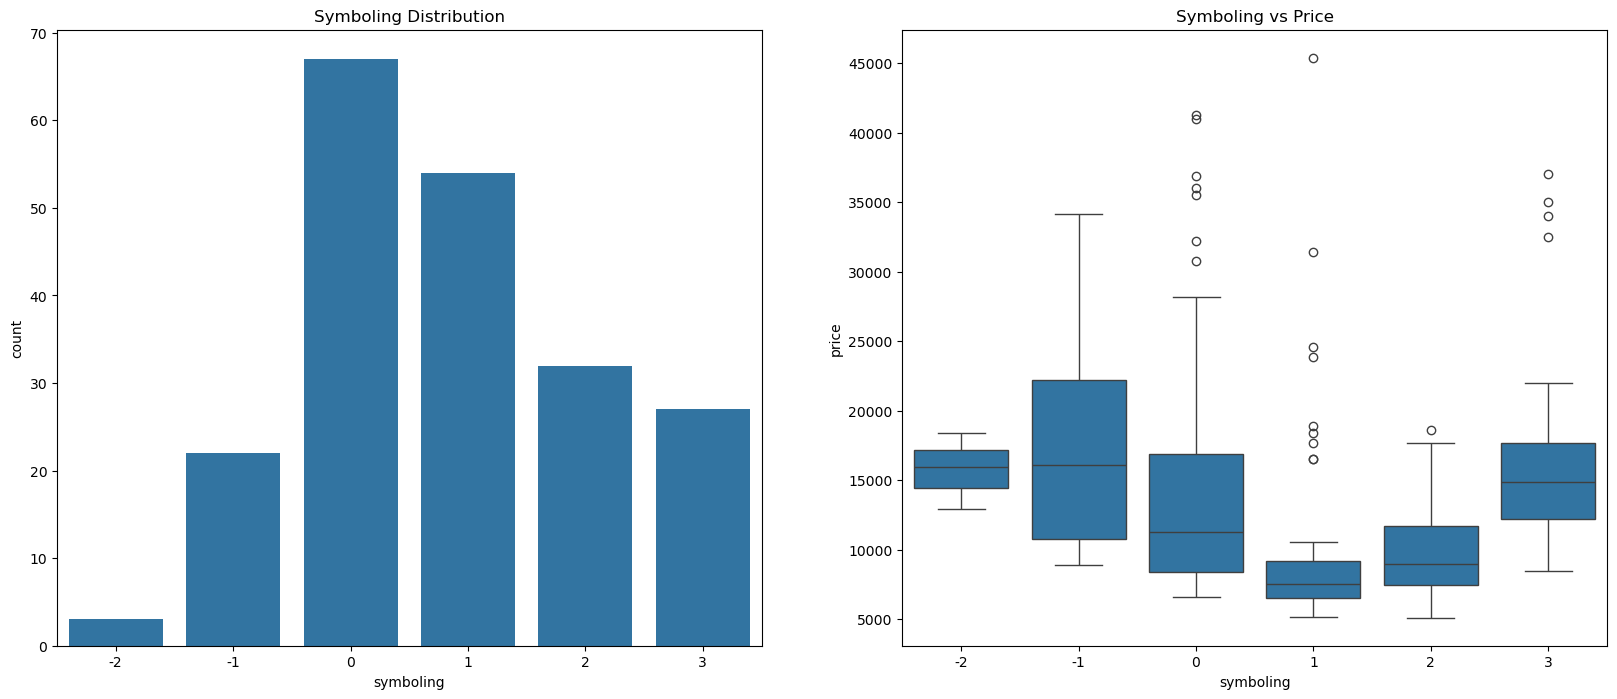

In [352]:
# Determining the Frequency and Distribution of Price value per Symboling category
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title("Symboling Distribution")
sns.countplot(x = 'symboling', data = cars)

plt.subplot(1,2,2)
plt.title("Symboling vs Price")
sns.boxplot(x = cars.symboling, y = cars.price)
plt.show()

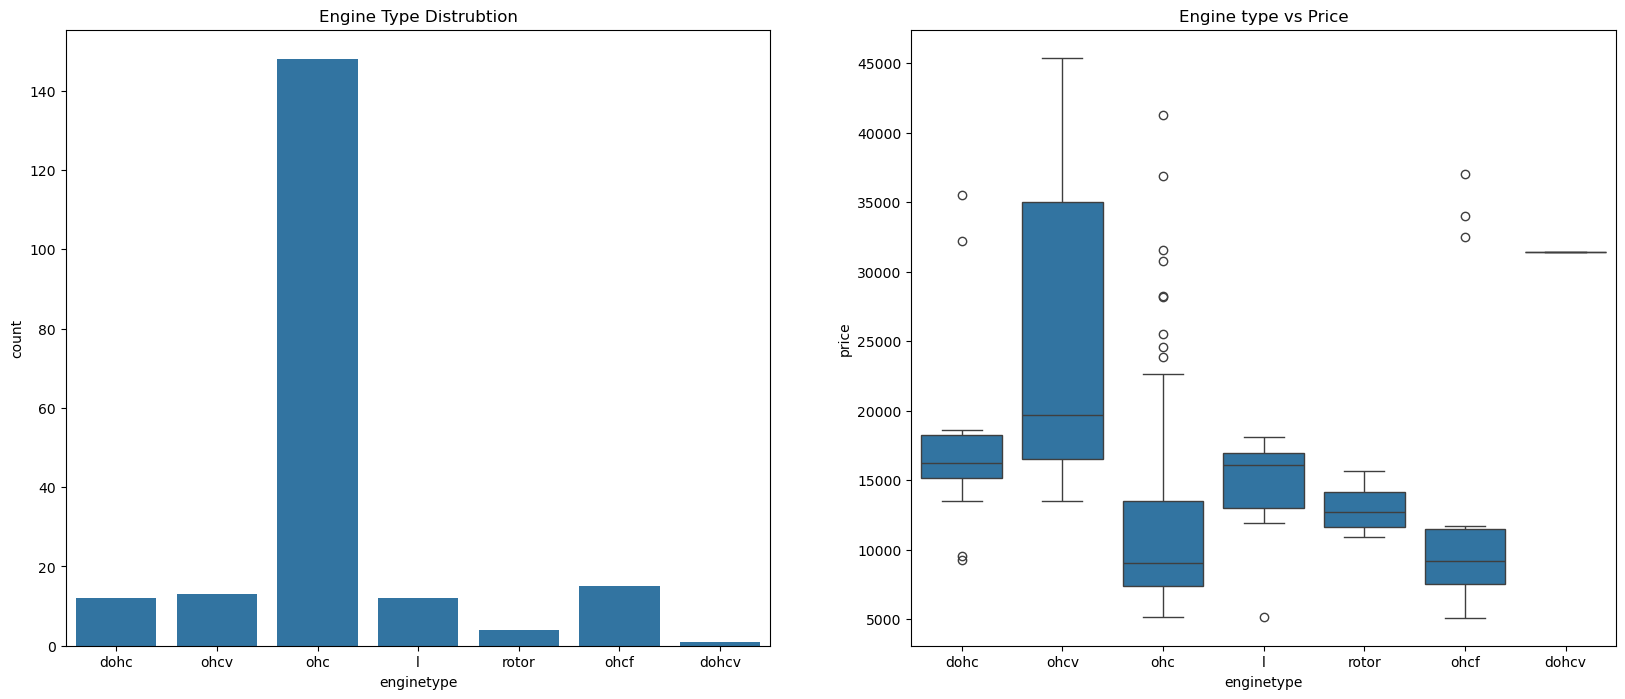

In [353]:
# Determining the count/frequency and Distribution of Price values per Engine type

plt.figure(figsize =(20,8))

plt.subplot(1,2,1)
plt.title("Engine Type Distrubtion")
sns.countplot(x = 'enginetype', data = cars)

plt.subplot(1,2,2)
plt.title("Engine type vs Price")
sns.boxplot(x = cars.enginetype, y = cars.price)
plt.show()          

<Figure size 800x600 with 0 Axes>

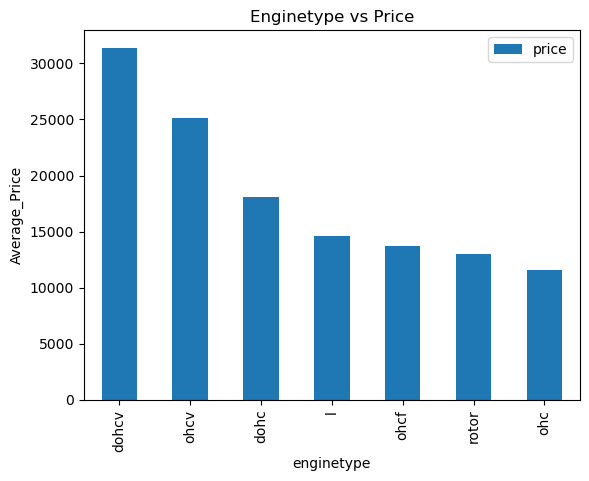

In [354]:
# Determinining the averageprice of each engine type
df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
plt.figure(figsize = (8,6))
df.plot(kind = 'bar')
plt.ylabel('Average_Price')
plt.title('Enginetype vs Price')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

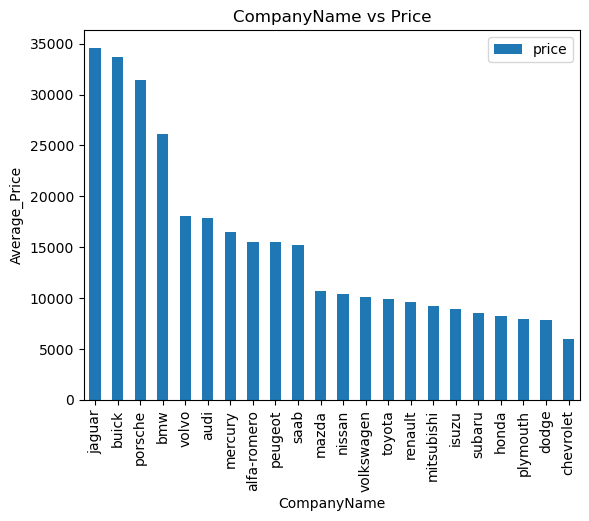

In [355]:
# Determining Average Price per Company, Per fuel Type and Car type
df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot(kind = 'bar')
plt.title('CompanyName vs Price')
plt.ylabel("Average_Price")
plt.show

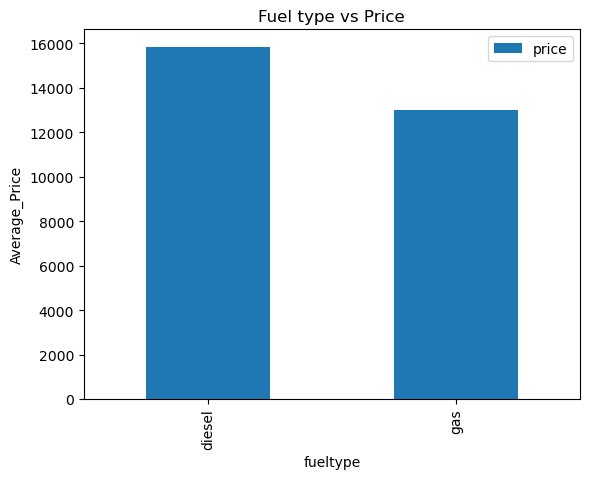

In [356]:
# Fueltype with price of the car
df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot(kind ='bar')
plt.ylabel("Average_Price")
plt.title("Fuel type vs Price")
plt.show()

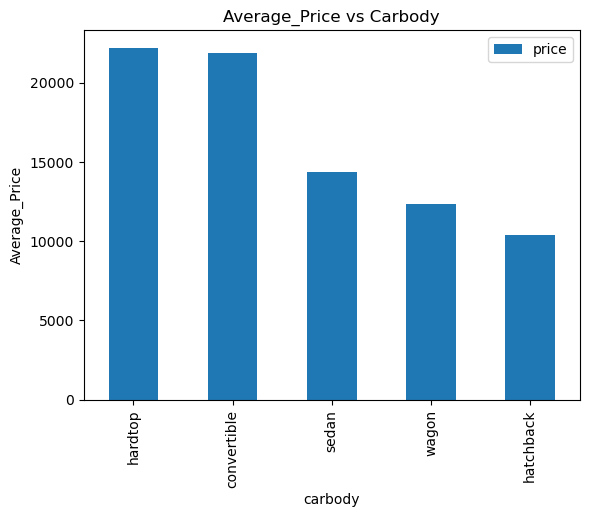

In [357]:
# Carbody per price of the car
df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot(kind = 'bar')
plt.title("Average_Price vs Carbody")
plt.ylabel("Average_Price")
plt.show()

In [358]:
# Finding the correlation between between Price, Carlength, CarWidth, CarHieght, CarWieght using the scatterplot
def scatter(x, fig):
    plt.subplot(5,2, fig)
    plt.scatter(cars[x], cars.price)
    plt.title(x+ 'vs Price')
    plt.xlabel(x)
    plt.ylabel('Price')


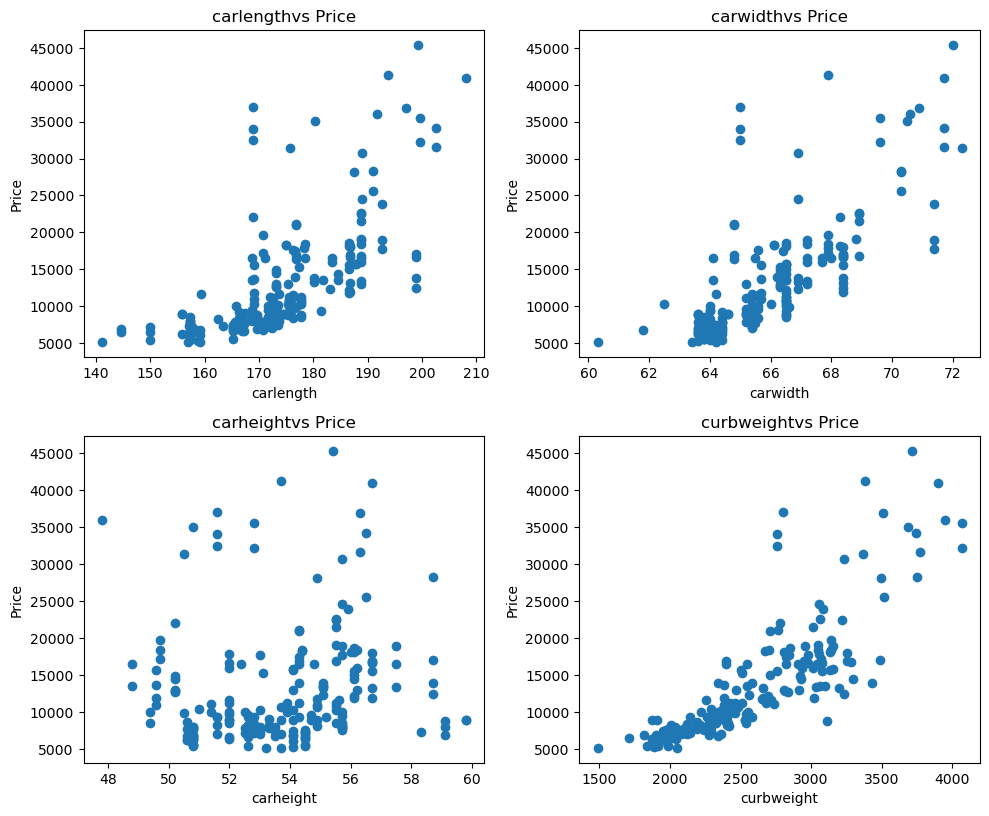

In [359]:
plt.figure(figsize =(10,20))
scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout() # Allows some spacing between the plots

In [360]:
# Obtaining a new column called fueleconomy
cars['fueleconomy'] = (cars['citympg']*0.55) + (0.45* cars['highwaympg'])

In [361]:
# Bining the car Company based on avg prices of each company
cars['price'] = cars['price'].astype(int)
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how = 'left', on = 'CompanyName')
bins = [0, 10000, 20000, 40000]
cars_bin = ['budget', 'Medium', 'Highend']
cars['carsarange'] = pd.cut(temp['price_y'], bins, right = False, labels = cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsarange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


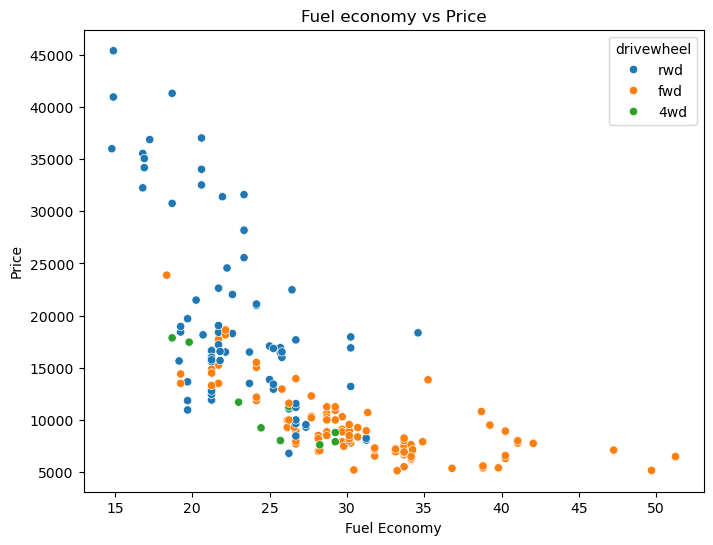

<Figure size 640x480 with 0 Axes>

In [362]:
# Finding the relationship between Fuel Economy and Price. Third dimension - DriveWheel
plt.figure(figsize =(8,6))
plt.title('Fuel economy vs Price')
sns.scatterplot(x = cars['fueleconomy'], y = cars['price'], hue = cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()
plt.tight_layout()

In [363]:
# Find the correlation between the dataset
#cor = cars.corr()

In [364]:
# Creation of Dummy variables for Ordinal variables
print(cars['fueltype'].unique())
print(cars['aspiration'].unique())
print(cars['carbody'].unique())
print(cars['drivewheel'].unique())
print(cars['enginetype'].unique())
print(cars['cylindernumber'].unique())
print(cars['carsarange'].unique())
print(cars['fuelsystem'].unique())
print(cars['CompanyName'].unique())
print(cars['doornumber'].unique())
print(cars['enginelocation'].unique())

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['Medium', 'Highend', 'budget']
Categories (3, object): ['budget' < 'Medium' < 'Highend']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['two' 'four']
['front' 'rear']


In [365]:
#cars.isnull().sum()

In [366]:
# Creating a dummy variable for the categorical dataset variables
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [367]:
#Applying function on cars_lr
cars_lr = cars
cars_lr = dummies('fueltype', cars_lr)
cars_lr = dummies('aspiration', cars_lr)
cars_lr = dummies('carbody', cars_lr)
cars_lr = dummies('drivewheel', cars_lr)
cars_lr = dummies('enginetype', cars_lr)
cars_lr = dummies('carsarange', cars_lr)
cars_lr = dummies('fuelsystem', cars_lr)
cars_lr = dummies('cylindernumber', cars_lr)
cars_lr = dummies('CompanyName', cars_lr)
cars_lr = dummies('doornumber', cars_lr)
cars_lr = dummies('enginelocation', cars_lr)

In [368]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    int32  
 16  fueleconomy       205 non-null    float64
 1

In [369]:
# Obtaining the shape of the variable
cars_lr.shape

(205, 69)

In [370]:
# Splitting our datavariable into train_test_split vairables
from sklearn.model_selection import train_test_split

In [371]:
np.random.seed(0) # We apply not to make any changes the random_varibles created
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [372]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [373]:
df_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear
122,123,1,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,...,True,False,False,False,False,False,False,False,False,False
125,126,3,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,...,False,True,False,False,False,False,False,False,True,False
166,167,1,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,...,False,False,False,False,False,True,False,False,True,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,True,False
199,200,-1,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,1,96.3,172.4,65.4,51.6,2403,110,3.17,3.46,...,False,False,False,False,False,False,False,False,False,False
103,104,0,100.4,184.6,66.5,55.1,3060,181,3.43,3.27,...,False,False,False,False,False,False,False,False,False,False
67,68,-1,110.0,190.9,70.3,56.5,3515,183,3.58,3.64,...,False,False,False,False,False,False,False,False,False,False
24,25,1,93.7,157.3,63.8,50.6,1967,90,2.97,3.23,...,False,False,False,False,False,False,False,False,False,False


In [374]:

# Dividing the df_train into X and Y features
#y_train = df_train.pop('price')
#x_train = df_train

In [375]:
def scale_true_false_columns(df):

    # Identify True/False columns
    true_false_cols = df.select_dtypes(include=['bool']).columns

    # Create a MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the True/False columns
    df[true_false_cols] = scaler.fit_transform(df[true_false_cols])

    return df  # Return the dataframe with scaled True/False columns

In [376]:
df_trained = scale_true_false_columns(df_train)

In [377]:
# Applying the MinMax to standardize the numeric values
num_vars = ['wheelbase', 'carwidth', 'carheight', 'carlength', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
            'highwaympg', 'fueleconomy']

In [378]:
df_trained[num_vars] = scaler.fit_transform(df_trained[num_vars])

In [379]:
df_trained.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear
122,123,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,126,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
166,167,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
199,200,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [380]:
# Dividing the model into  X and Y training variables
y_trained = df_trained.pop('price')

In [381]:
y_trained

122     7609
125    22018
166     9538
1      16500
199    18950
       ...  
87      9279
103    13499
67     25552
24      6229
8      23875
Name: price, Length: 143, dtype: int32

In [382]:
X_trained = df_trained

In [383]:
X_trained

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear
122,123,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,126,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
166,167,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
199,200,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,1,0.334483,0.508943,0.425000,0.336283,0.354926,0.184906,0.388889,0.641414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,104,0,0.475862,0.707317,0.516667,0.646018,0.609775,0.452830,0.595238,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,68,-1,0.806897,0.809756,0.833333,0.769912,0.786268,0.460377,0.714286,0.732323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,25,1,0.244828,0.263415,0.291667,0.247788,0.185803,0.109434,0.230159,0.525253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [384]:
# Removing all feature values of p>0.05
X_trained_1 = X_trained.drop(['car_ID', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'hardtop', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'Medium', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi','two', 'audi', 'buick',
       'chevrolet', 'dodge','honda', 'isuzu', 'jaguar', 'mazda', 'mercury','nissan', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'two', 'rear'], axis = 1)
                          

In [385]:
X_trained_1

,symboling,carwidth,curbweight,enginesize,boreratio,stroke,peakrpm,fueleconomy,gas,turbo,...,spfi,five,four,six,three,twelve,bmw,mitsubishi,peugeot,plymouth
122,1,0.291667,0.272692,0.139623,0.230159,0.525253,0.551020,0.530864,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
125,3,0.666667,0.500388,0.339623,1.000000,0.464646,0.551020,0.213992,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,1,0.308333,0.314973,0.139623,0.444444,0.449495,1.000000,0.344307,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.316667,0.411171,0.260377,0.626984,0.247475,0.346939,0.244170,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,-1,0.575000,0.647401,0.260377,0.746032,0.484848,0.387755,0.122085,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,0.425000,0.354926,0.184906,0.388889,0.641414,0.551020,0.311385,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
103,0,0.516667,0.609775,0.452830,0.595238,0.545455,0.428571,0.189300,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
67,-1,0.833333,0.786268,0.460377,0.714286,0.732323,0.081633,0.234568,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,1,0.291667,0.185803,0.109434,0.230159,0.525253,0.551020,0.530864,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [386]:
# Builidng our model
from sklearn.feature_selection import  RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [387]:
# defining my Linear Regression Model
def build_model(X,y):
    X = sm.add_constant(X) # Adding some constant for setting the biase of the model
    lm = sm.OLS(y,X).fit() # Fitting the model
    print(lm.summary())
    return lm


In [388]:
def CheckVIF(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [389]:

model1= build_model(X_trained, y_trained) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.58
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           3.34e-49
Time:                        10:40:35   Log-Likelihood:                -1219.0
No. Observations:                 143   AIC:                             2556.
Df Residuals:                      84   BIC:                             2731.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8684.7473   6014.002  

In [390]:
model2 = build_model(X_trained_1, y_trained) # After dropping off some columns that gives high values of null_hypothesis value

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     90.17
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           5.25e-64
Time:                        10:40:36   Log-Likelihood:                -1279.3
No. Observations:                 143   AIC:                             2605.
Df Residuals:                     120   BIC:                             2673.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2963.1241   3529.788     -0.839      

In [391]:
X_trained_1.columns

Index(['symboling', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'fueleconomy', 'gas', 'turbo', 'hatchback',
       'rotor', 'Highend', 'spfi', 'five', 'four', 'six', 'three', 'twelve',
       'bmw', 'mitsubishi', 'peugeot', 'plymouth'],
      dtype='object')

In [392]:
# Using the Variance Inflation factor
CheckVIF(X_trained_1)

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Feature,VIF
3,enginesize,160.97
15,four,118.83
2,curbweight,89.50
1,carwidth,48.27
4,boreratio,47.96
5,stroke,46.43
8,gas,24.88
7,fueleconomy,21.22
16,six,10.06
6,peakrpm,9.39


In [393]:
X_trained_2 = X_trained_1.drop(['symboling','spfi','carwidth', 'curbweight', 'enginesize', 'boreratio','bmw', 'peugeot','plymouth','twelve','three',
       'stroke', 'peakrpm', 'fueleconomy','rotor', 'five', 'four', 'six', 'gas'], axis= 1)

In [394]:
Model3 = build_model(X_trained_2, y_trained)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     77.93
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.94e-34
Time:                        10:40:36   Log-Likelihood:                -1399.6
No. Observations:                 143   AIC:                             2809.
Df Residuals:                     138   BIC:                             2824.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.074e+04    522.153     20.561      0.0

In [395]:
# Using the Recurrsive feature Elimination Method(RFE)
lm = LinearRegression()
lm.fit(X_trained_1,y_trained) # Passing the X_trained_1 and y_trained for the model to learn from

rfe = RFE(lm)
rfe = rfe.fit(X_trained_1, y_trained) # Fitting X_trained and y_train to rfe

In [396]:
list(zip(X_trained.columns, rfe.support_, rfe.ranking_))

[('car_ID', False, 12),
 ('symboling', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('stroke', False, 5),
 ('compressionratio', False, 10),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 13),
 ('highwaympg', False, 2),
 ('fueleconomy', False, 3),
 ('gas', False, 6),
 ('turbo', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', False, 4),
 ('wagon', False, 7),
 ('fwd', False, 9)]

In [397]:
# Obtaining the best features required for training the model
X_trained_1.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'peakrpm', 'rotor', 'Highend', 'three', 'twelve', 'bmw'],
      dtype='object')

In [398]:
# Building model using statsmodel for detailed statistics
X_trained_rfe = X_trained[X_trained_1.columns[rfe.support_]]

In [399]:
X_trained_rfe.head()

,carwidth,curbweight,enginesize,boreratio,stroke,peakrpm,rotor,Highend,three,twelve,bmw
122,0.291667,0.272692,0.139623,0.230159,0.525253,0.551020,0.0,0.0,0.0,0.0,0.0
125,0.666667,0.500388,0.339623,1.000000,0.464646,0.551020,0.0,1.0,0.0,0.0,0.0
166,0.308333,0.314973,0.139623,0.444444,0.449495,1.000000,0.0,0.0,0.0,0.0,0.0
1,0.316667,0.411171,0.260377,0.626984,0.247475,0.346939,0.0,0.0,0.0,0.0,0.0
199,0.575000,0.647401,0.260377,0.746032,0.484848,0.387755,0.0,0.0,0.0,0.0,0.0


In [400]:
# Create a model using the rfe features
model4 =  build_model(X_trained_rfe, y_trained)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     142.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           3.52e-67
Time:                        10:40:36   Log-Likelihood:                -1301.0
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     131   BIC:                             2662.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        808.1834   1167.503      0.692      0.4

In [401]:
# Performing Residual Analysis
X_trained_New = sm.add_constant(X_trained_rfe)

In [402]:
X_trained_New

,const,carwidth,curbweight,enginesize,boreratio,stroke,peakrpm,rotor,Highend,three,twelve,bmw
122,1.0,0.291667,0.272692,0.139623,0.230159,0.525253,0.551020,0.0,0.0,0.0,0.0,0.0
125,1.0,0.666667,0.500388,0.339623,1.000000,0.464646,0.551020,0.0,1.0,0.0,0.0,0.0
166,1.0,0.308333,0.314973,0.139623,0.444444,0.449495,1.000000,0.0,0.0,0.0,0.0,0.0
1,1.0,0.316667,0.411171,0.260377,0.626984,0.247475,0.346939,0.0,0.0,0.0,0.0,0.0
199,1.0,0.575000,0.647401,0.260377,0.746032,0.484848,0.387755,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.425000,0.354926,0.184906,0.388889,0.641414,0.551020,0.0,0.0,0.0,0.0,0.0
103,1.0,0.516667,0.609775,0.452830,0.595238,0.545455,0.428571,0.0,0.0,0.0,0.0,0.0
67,1.0,0.833333,0.786268,0.460377,0.714286,0.732323,0.081633,0.0,1.0,0.0,0.0,0.0
24,1.0,0.291667,0.185803,0.109434,0.230159,0.525253,0.551020,0.0,0.0,0.0,0.0,0.0


In [403]:
# Makind predictions to our new dataset - X_trained_rfe
y_train_price  = model4.predict(X_trained_New)

C:\Users\hp\AppData\Local\Temp\ipykernel_22240\211772153.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_trained-y_train_price), bins = 20)


Text(0.5, 0, 'Error')

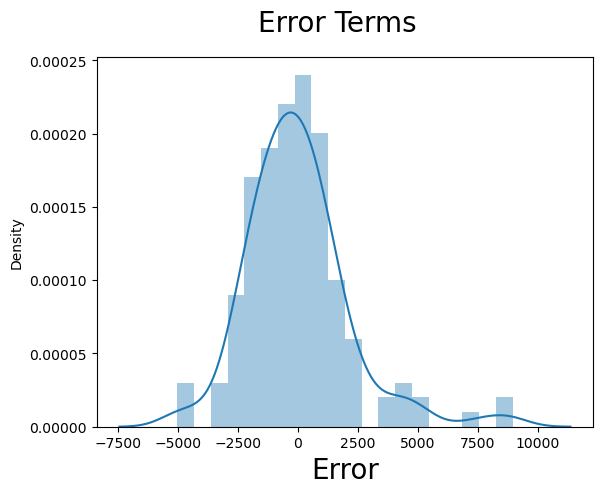

In [404]:
# Making a distribution of the plotted values
fig = plt.figure()
sns.distplot((y_trained-y_train_price), bins = 20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Error", fontsize = 20)

In [405]:
df_test

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear
160,161,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,...,False,False,False,False,False,True,False,False,False,False
186,187,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,...,False,False,False,False,False,False,True,False,False,False
59,60,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,...,False,False,False,False,False,False,False,False,True,False
165,166,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,...,False,False,False,False,False,True,False,False,True,False
140,141,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,...,False,False,False,False,False,False,False,False,False,False
29,30,3,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,...,False,False,False,False,False,False,False,False,True,False
182,183,2,97.3,171.7,65.5,55.7,2261,97,3.01,3.40,...,False,False,False,False,False,False,True,False,True,False
40,41,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,...,False,False,False,False,False,False,False,False,False,False


In [406]:
df_tested = scale_true_false_columns(df_test)

In [407]:
df_tested

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear
160,161,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
186,187,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59,60,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
165,166,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
140,141,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,30,3,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
182,183,2,97.3,171.7,65.5,55.7,2261,97,3.01,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
40,41,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [408]:
y_test = df_tested.pop('price')


In [409]:
X_test = df_tested # Remaining df_tested is stored in the X_tested variable

In [410]:
X_test # Testing variables without the price

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear
160,161,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
186,187,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59,60,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
165,166,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
140,141,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,30,3,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
182,183,2,97.3,171.7,65.5,55.7,2261,97,3.01,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
40,41,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [426]:
# Applying scaling based on the RFE based parameters
X_tested = pd.DataFrame(scaler.fit_transform(X_test[X_trained_1.columns[rfe.support_]]), columns = X_trained_1.columns[rfe.support_])

In [427]:
X_tested

,carwidth,curbweight,enginesize,boreratio,stroke,peakrpm,rotor,Highend,three,twelve,bmw
0,0.200000,0.132148,0.082969,0.515873,0.524590,0.265306,0.0,0.0,0.0,0.0,0.0
1,0.315789,0.219125,0.131004,0.515873,0.726776,0.448980,0.0,0.0,0.0,0.0,0.0
2,0.421053,0.271985,0.187773,0.674603,0.721311,0.265306,0.0,0.0,0.0,0.0,0.0
3,0.157895,0.214320,0.082969,0.555556,0.551913,1.000000,0.0,0.0,0.0,0.0,0.0
4,0.136842,0.202307,0.126638,0.857143,0.311475,0.102041,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
57,0.221053,0.344065,0.187773,0.634921,0.759563,0.346939,0.0,0.0,0.0,0.0,0.0
58,0.400000,0.476694,0.336245,0.841270,1.000000,0.346939,0.0,0.0,0.0,0.0,0.0
59,0.315789,0.212398,0.078603,0.373016,0.726776,0.265306,0.0,0.0,0.0,0.0,0.0
60,0.000000,0.265738,0.135371,0.484127,0.825137,0.673469,0.0,0.0,0.0,0.0,0.0


In [416]:
# Performing Residual Analysis
X_tested_New =  sm.add_constant(X_tested)

In [417]:
X_tested_New

,const,carwidth,curbweight,enginesize,boreratio,stroke,peakrpm,rotor,Highend,three,twelve,bmw
0,1.0,0.200000,0.132148,0.082969,0.515873,0.524590,0.265306,0.0,0.0,0.0,0.0,0.0
1,1.0,0.315789,0.219125,0.131004,0.515873,0.726776,0.448980,0.0,0.0,0.0,0.0,0.0
2,1.0,0.421053,0.271985,0.187773,0.674603,0.721311,0.265306,0.0,0.0,0.0,0.0,0.0
3,1.0,0.157895,0.214320,0.082969,0.555556,0.551913,1.000000,0.0,0.0,0.0,0.0,0.0
4,1.0,0.136842,0.202307,0.126638,0.857143,0.311475,0.102041,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.0,0.221053,0.344065,0.187773,0.634921,0.759563,0.346939,0.0,0.0,0.0,0.0,0.0
58,1.0,0.400000,0.476694,0.336245,0.841270,1.000000,0.346939,0.0,0.0,0.0,0.0,0.0
59,1.0,0.315789,0.212398,0.078603,0.373016,0.726776,0.265306,0.0,0.0,0.0,0.0,0.0
60,1.0,0.000000,0.265738,0.135371,0.484127,0.825137,0.673469,0.0,0.0,0.0,0.0,0.0


In [415]:
y_test

160     7738
186     8495
59      8845
165     9298
140     7603
       ...  
28      8921
29     12964
182     7775
40     10295
128    37028
Name: price, Length: 62, dtype: int32

In [418]:
# Makiing predictions on the X_tested values
y_pred =model4.predict(X_tested_New)

In [433]:
# Model Performance Comparsion between Train and Test (Generalization)

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
print("Testing Prediction R-Squared on Test", r2_score(y_test, y_pred))

Testing Prediction R-Squared on Test 0.7489047498275794


In [424]:
# Testing prediction for trained variables
print("Testing Prediction of R-squared on Train", r2_score(y_trained, y_train_price))

Testing Prediction of R-squared on Train 0.9227233555681698


C:\Users\hp\AppData\Local\Temp\ipykernel_22240\2541262335.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred), bins = 30)


Text(0.5, 0, 'Error')

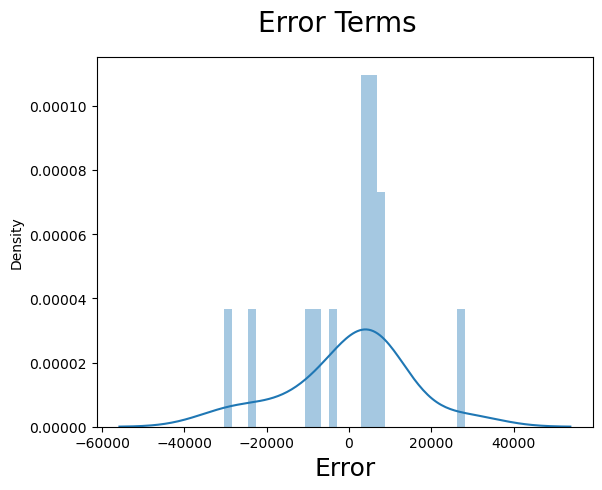

In [429]:
# Making Plot for the residual Normality
fig = plt.figure()
sns.distplot((y_test-y_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Error', fontsize = 18)

Text(0, 0.5, 'y_Pred')

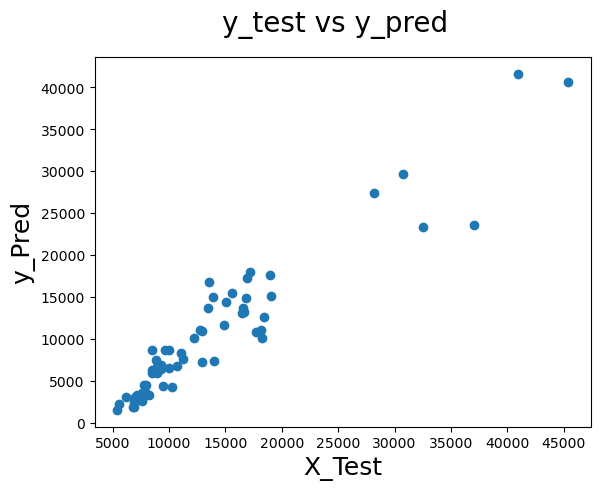

In [430]:
# Evaluation of the model
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('X_Test', fontsize = 18)
plt.ylabel('y_Pred', fontsize = 18)